#Essential Library

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#Data Augmentation

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

228827136/228813984 [==============================] - 9s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib #helps in managing files in directory
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/dandelion/18970601002_d70bc883a9.jpg'),
 PosixPath('datasets/flower_photos/dandelion/160456948_38c3817c6a_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18089878729_907ed2c7cd_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/17747738311_5014b1f77f.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8956863946_f96be02aae_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4638438929_2ec76083c8_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3954167682_128398bf79_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18282528206_7fb3166041.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5673112305_02fe19297b_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5670543216_8c4cb0caa8_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7465850028_cdfaae235a_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14373114081_7922bcf765_n.jpg'),
 PosixPath('d

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5990626258_697f007308_n.jpg'),
 PosixPath('datasets/flower_photos/roses/685724528_6cd5cbe203.jpg'),
 PosixPath('datasets/flower_photos/roses/6039330368_c30ed224c4_m.jpg'),
 PosixPath('datasets/flower_photos/roses/353897245_5453f35a8e.jpg'),
 PosixPath('datasets/flower_photos/roses/1446097778_97149b8362.jpg')]

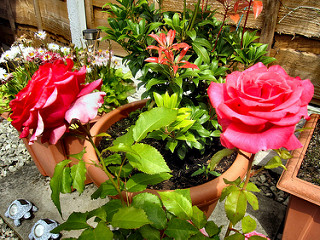

In [9]:
PIL.Image.open(str(roses[0]))

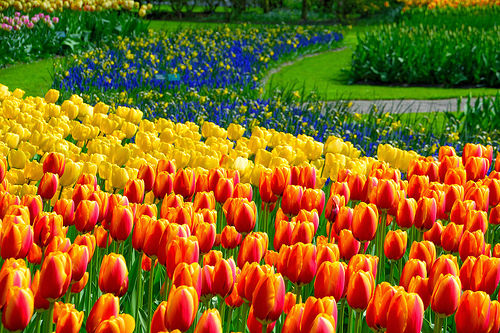

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5990626258_697f007308_n.jpg'),
 PosixPath('datasets/flower_photos/roses/685724528_6cd5cbe203.jpg'),
 PosixPath('datasets/flower_photos/roses/6039330368_c30ed224c4_m.jpg'),
 PosixPath('datasets/flower_photos/roses/353897245_5453f35a8e.jpg'),
 PosixPath('datasets/flower_photos/roses/1446097778_97149b8362.jpg')]

In [13]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [14]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/5990626258_697f007308_n.jpg')

In [15]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5990626258_697f007308_n.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))  #pass path in str and it returns numpy array
img

array([[[ 14,  23,  36],
        [ 11,  20,  33],
        [ 16,  23,  38],
        ...,
        [ 44,  86, 115],
        [ 46,  85, 117],
        [ 35,  73, 105]],

       [[ 24,  33,  47],
        [ 22,  30,  47],
        [ 22,  30,  47],
        ...,
        [ 20,  70,  93],
        [ 40,  89, 115],
        [ 42,  89, 117]],

       [[ 24,  34,  52],
        [ 21,  31,  49],
        [ 21,  31,  49],
        ...,
        [ 40,  90, 110],
        [ 56, 104, 128],
        [ 73, 119, 143]],

       ...,

       [[108, 125, 151],
        [168, 178, 212],
        [205, 226, 224],
        ...,
        [ 52,  85, 164],
        [ 53,  87, 163],
        [ 55,  90, 164]],

       [[107, 120, 112],
        [134, 152, 159],
        [121, 144, 146],
        ...,
        [ 53,  86, 165],
        [ 53,  87, 163],
        [ 53,  88, 162]],

       [[144, 163, 176],
        [ 92, 138, 139],
        [ 71, 113, 125],
        ...,
        [ 55,  88, 167],
        [ 52,  87, 161],
        [ 50,  85, 159]]

In [19]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [22]:
X, y = [] , []

for flower_name , img_path in flowers_images_dict.items(): #items -> key, value
    for path in img_path:
        img = cv2.imread(str(path))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [25]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [30]:
model = Sequential([
                    layers.Conv2D(16 , 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32 , 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64 , 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),

                    # Dense
                    layers.Flatten(), #flatten before passing into dense network
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(5, activation = 'softmax'),
                    
])


model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 10s 15ms/step - loss: 1.2088 - accuracy: 0.4956
Epoch 2/30
86/86 [==============================] - 1s 15ms/step - loss: 0.9348 - accuracy: 0.6359
Epoch 3/30
86/86 [==============================] - 1s 15ms/step - loss: 0.7105 - accuracy: 0.7249
Epoch 4/30
86/86 [==============================] - 1s 15ms/step - loss: 0.4859 - accuracy: 0.8230
Epoch 5/30
86/86 [==============================] - 1s 15ms/step - loss: 0.3177 - accuracy: 0.8914
Epoch 6/30
86/86 [==============================] - 1s 15ms/step - loss: 0.1722 - accuracy: 0.9466
Epoch 7/30
86/86 [==============================] - 1s 15ms/step - loss: 0.1069 - accuracy: 0.9713
Epoch 8/30
86/86 [==============================] - 1s 15ms/step - loss: 0.0606 - accuracy: 0.9858
Epoch 9/30
86/86 [==============================] - 1s 15ms/step - loss: 0.0462 - accuracy: 0.9906
Epoch 10/30
86/86 [==============================] - 1s 15ms/step - loss: 0.0241 - accuracy: 0.9945
Epoch 11/30
86/86 [

In [31]:
model.evaluate(X_test_scaled, y_test) #Overfitting

 7/29 [======>.......................] - ETA: 0s - loss: 1.9298 - accuracy: 0.6920

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


29/29 [==============================] - 1s 12ms/step - loss: 2.2940 - accuracy: 0.6558


[2.294023036956787, 0.655773401260376]

In [32]:
predictions = model.predict(X_test_scaled)
predictions

array([[1.8653446e-01, 6.3142115e-01, 9.0882599e-02, 5.2870257e-04,
        9.0633057e-02],
       [1.2197522e-02, 1.9956492e-10, 1.8354459e-08, 1.2734950e-08,
        9.8780245e-01],
       [1.7593947e-04, 1.5241502e-06, 2.4781207e-04, 5.4674894e-01,
        4.5282575e-01],
       ...,
       [4.5235159e-13, 5.0276649e-15, 1.1735846e-05, 9.9998832e-01,
        1.4526266e-10],
       [1.3590074e-02, 2.0325428e-03, 9.8022020e-01, 2.3764701e-06,
        4.1548661e-03],
       [7.4933081e-14, 3.3731823e-08, 9.9992216e-01, 7.5479657e-05,
        2.3903738e-06]], dtype=float32)

In [34]:
# score = tf.nn.softmax(predictions[0])
score = predictions #All predictions

In [37]:
np.argmax(score[0]) #prediction of first input

1

In [38]:
y_test[0]

1

#Data Augmentation

In [39]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomZoom(0.3),

])

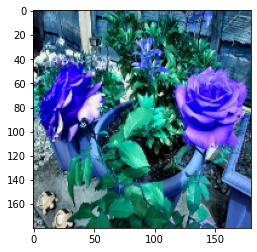

In [40]:
plt.imshow(X[0])

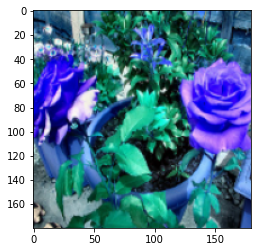

In [41]:
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [43]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (180, 180, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.3),
                                      

])

In [44]:
model = Sequential([
                    data_augmentation, #-----------------------------------------------
                    layers.Conv2D(16 , 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32 , 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64 , 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),

                    # Dense
                    layers.Flatten(), #flatten before passing into dense network
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(5, activation = 'softmax'),
                    
])


model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 2s 17ms/step - loss: 1.3791 - accuracy: 0.4008
Epoch 2/30
86/86 [==============================] - 1s 17ms/step - loss: 1.0567 - accuracy: 0.5839
Epoch 3/30
86/86 [==============================] - 2s 18ms/step - loss: 0.9707 - accuracy: 0.6243
Epoch 4/30
86/86 [==============================] - 1s 17ms/step - loss: 0.8934 - accuracy: 0.6526
Epoch 5/30
86/86 [==============================] - 1s 17ms/step - loss: 0.8592 - accuracy: 0.6810
Epoch 6/30
86/86 [==============================] - 1s 17ms/step - loss: 0.8127 - accuracy: 0.6857
Epoch 7/30
86/86 [==============================] - 2s 18ms/step - loss: 0.7580 - accuracy: 0.7024
Epoch 8/30
86/86 [==============================] - 2s 18ms/step - loss: 0.7632 - accuracy: 0.6988
Epoch 9/30
86/86 [==============================] - 1s 17ms/step - loss: 0.7161 - accuracy: 0.7366
Epoch 10/30
86/86 [==============================] - 2s 18ms/step - loss: 0.7122 - accuracy: 0.7282
Epoch 11/30
86/86 [=

In [46]:
model.evaluate(X_test_scaled, y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


29/29 [==============================] - 1s 14ms/step - loss: 0.8012 - accuracy: 0.7397


[0.8011944890022278, 0.7396514415740967]